In [ ]:
!nvidia-smi

Thu Oct 24 11:40:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pwd

/content


In [ ]:
!pip install ultralytics=8.3.21


from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.2/112.6 GB disk)


In [ ]:
!pip install --upgrade ultralytics

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Collab/Yolo

/content/drive/MyDrive/Collab/Yolo


In [ ]:
!ls

data2  data4	  runs	 yolo11n.pt					  yolov8s.pt
data3  data.yaml  wandb  Yolov8_object_detection_on_custom_dataset.ipynb


In [ ]:
%cd /content/drive/MyDrive/Collab/Yolo

!yolo task=detect mode=train model=yolov8l.pt data= data.yaml epochs=30 imgsz=640 plots=True

/content/drive/MyDrive/Collab/Yolo
100% 83.7M/83.7M [00:02<00:00, 40.0MB/s]
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

In [ ]:
!ls runs/detect/train3/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1729770557.2401bc7f88aa.4337.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch320.jpg	weights
P_curve.png					    train_batch321.jpg
PR_curve.png					    train_batch322.jpg


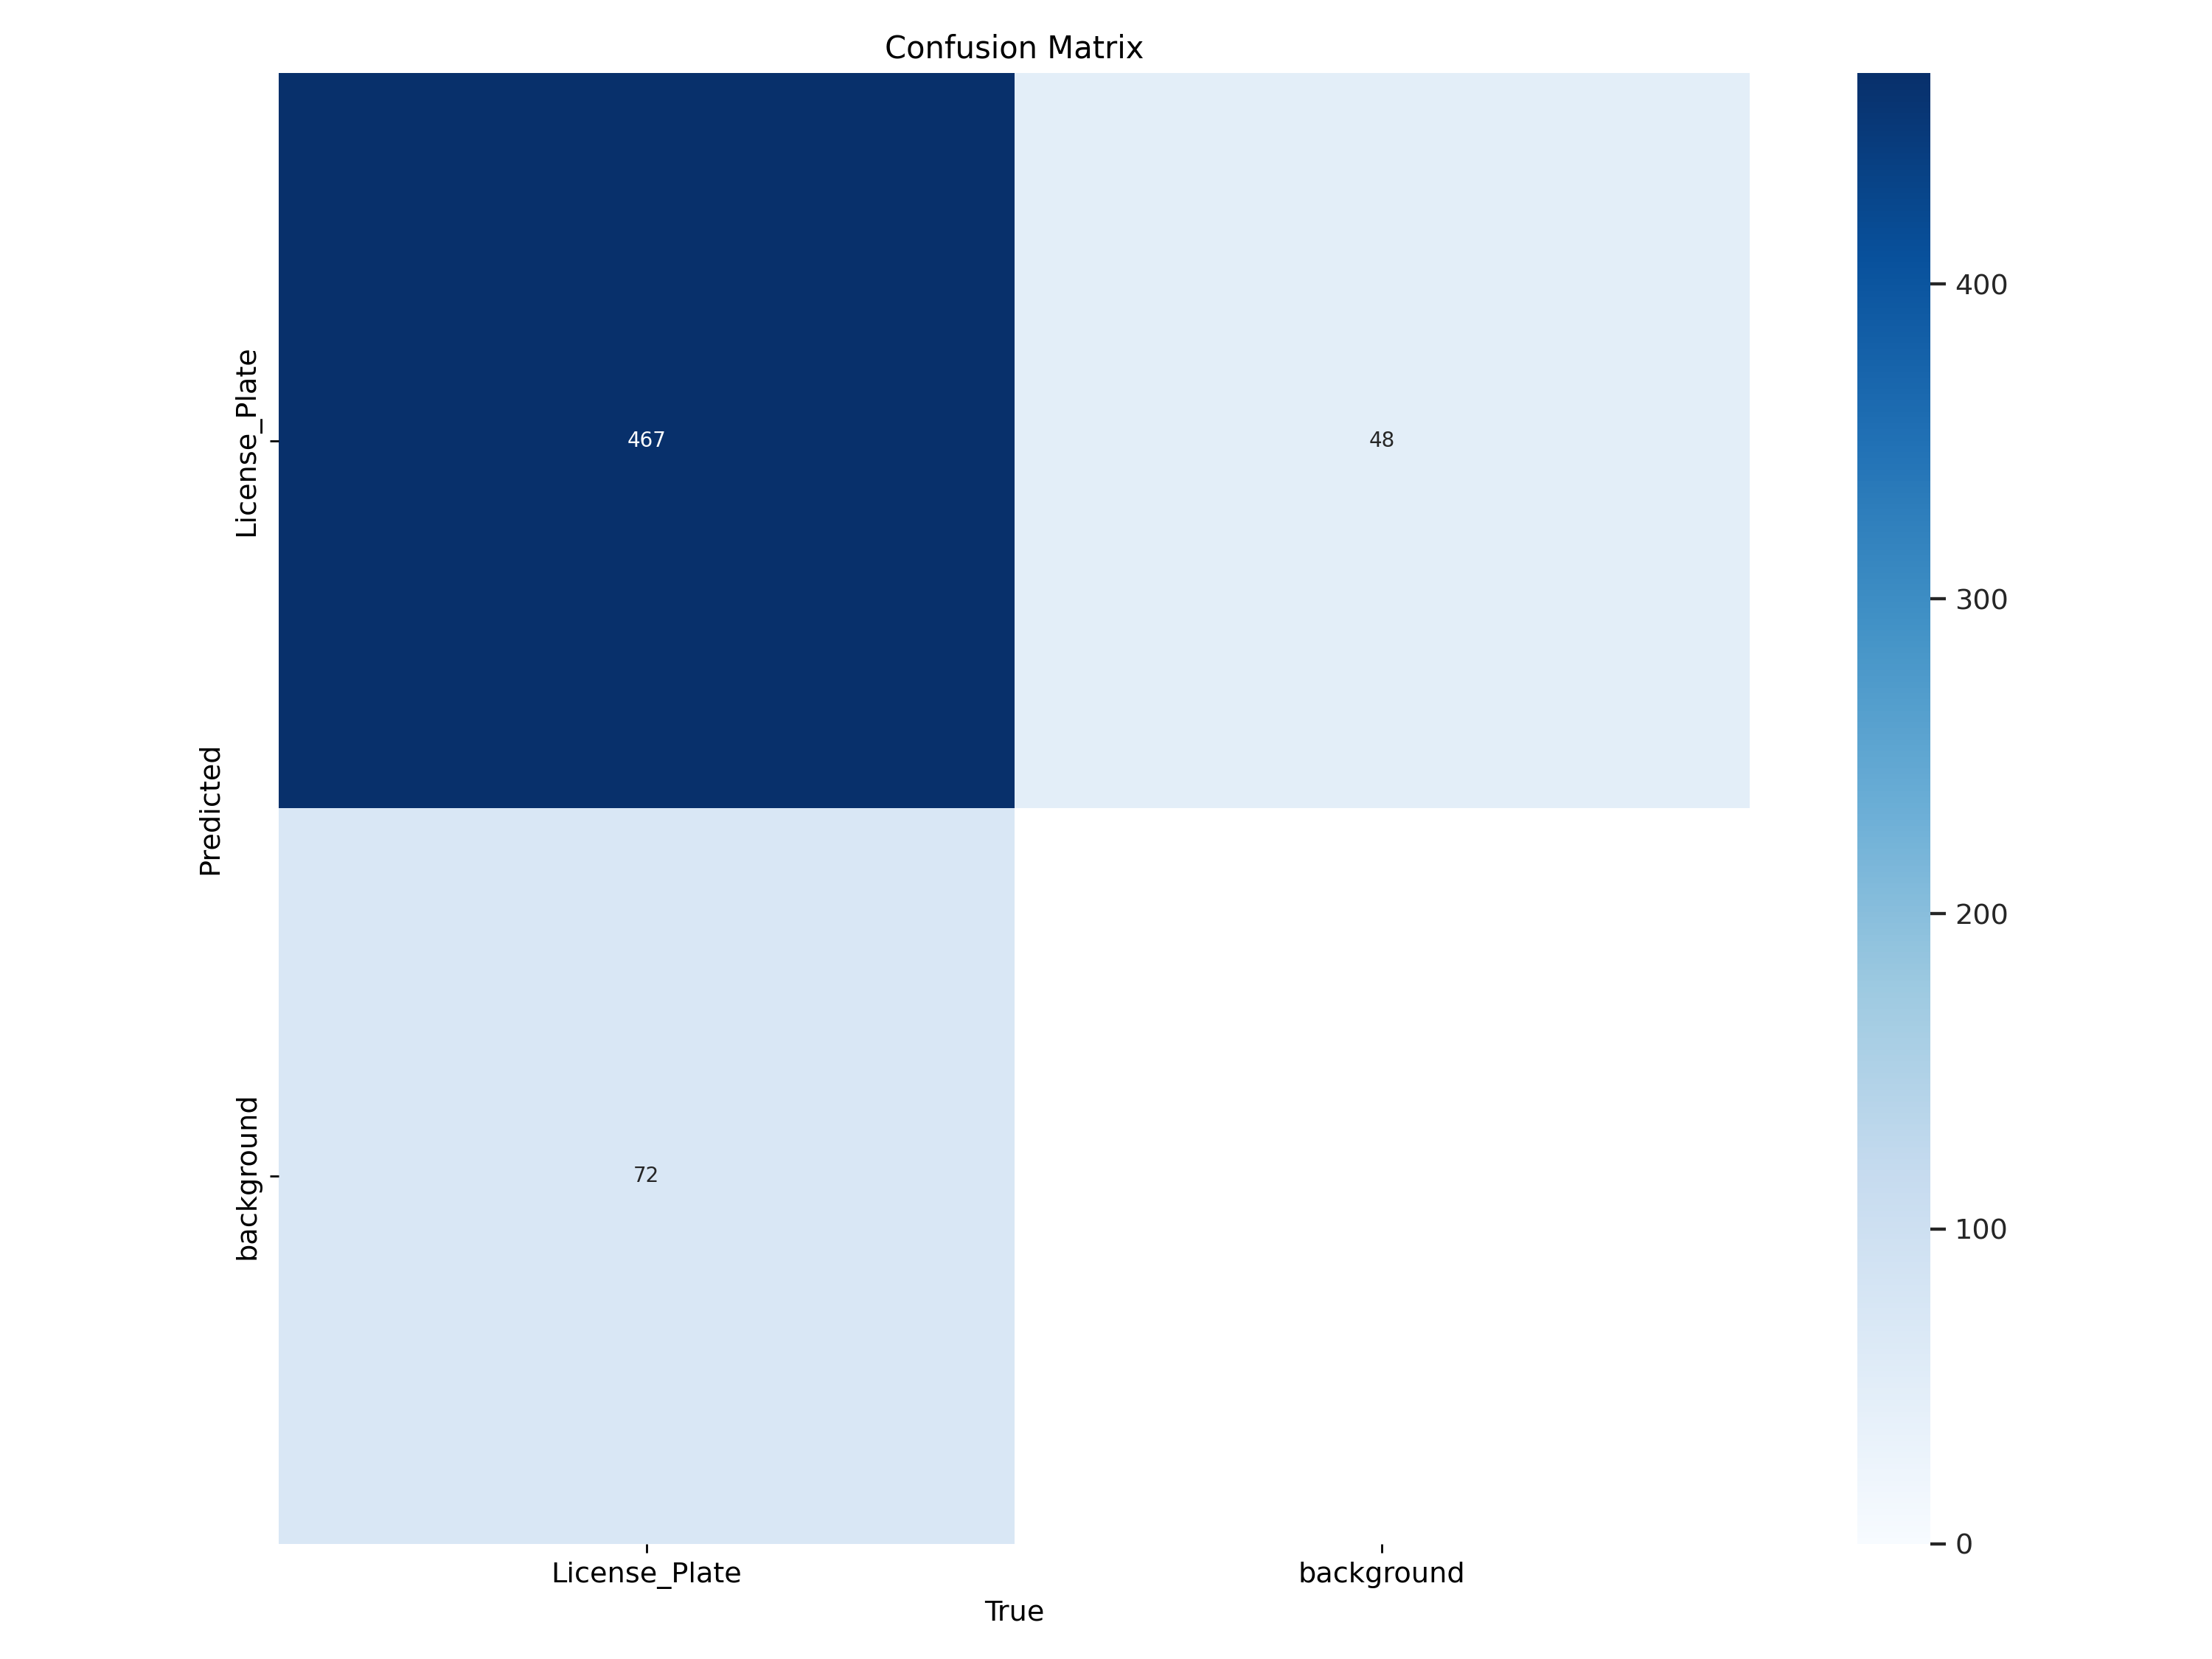

In [ ]:
Image(filename='runs/detect/train3/confusion_matrix.png', width=600)

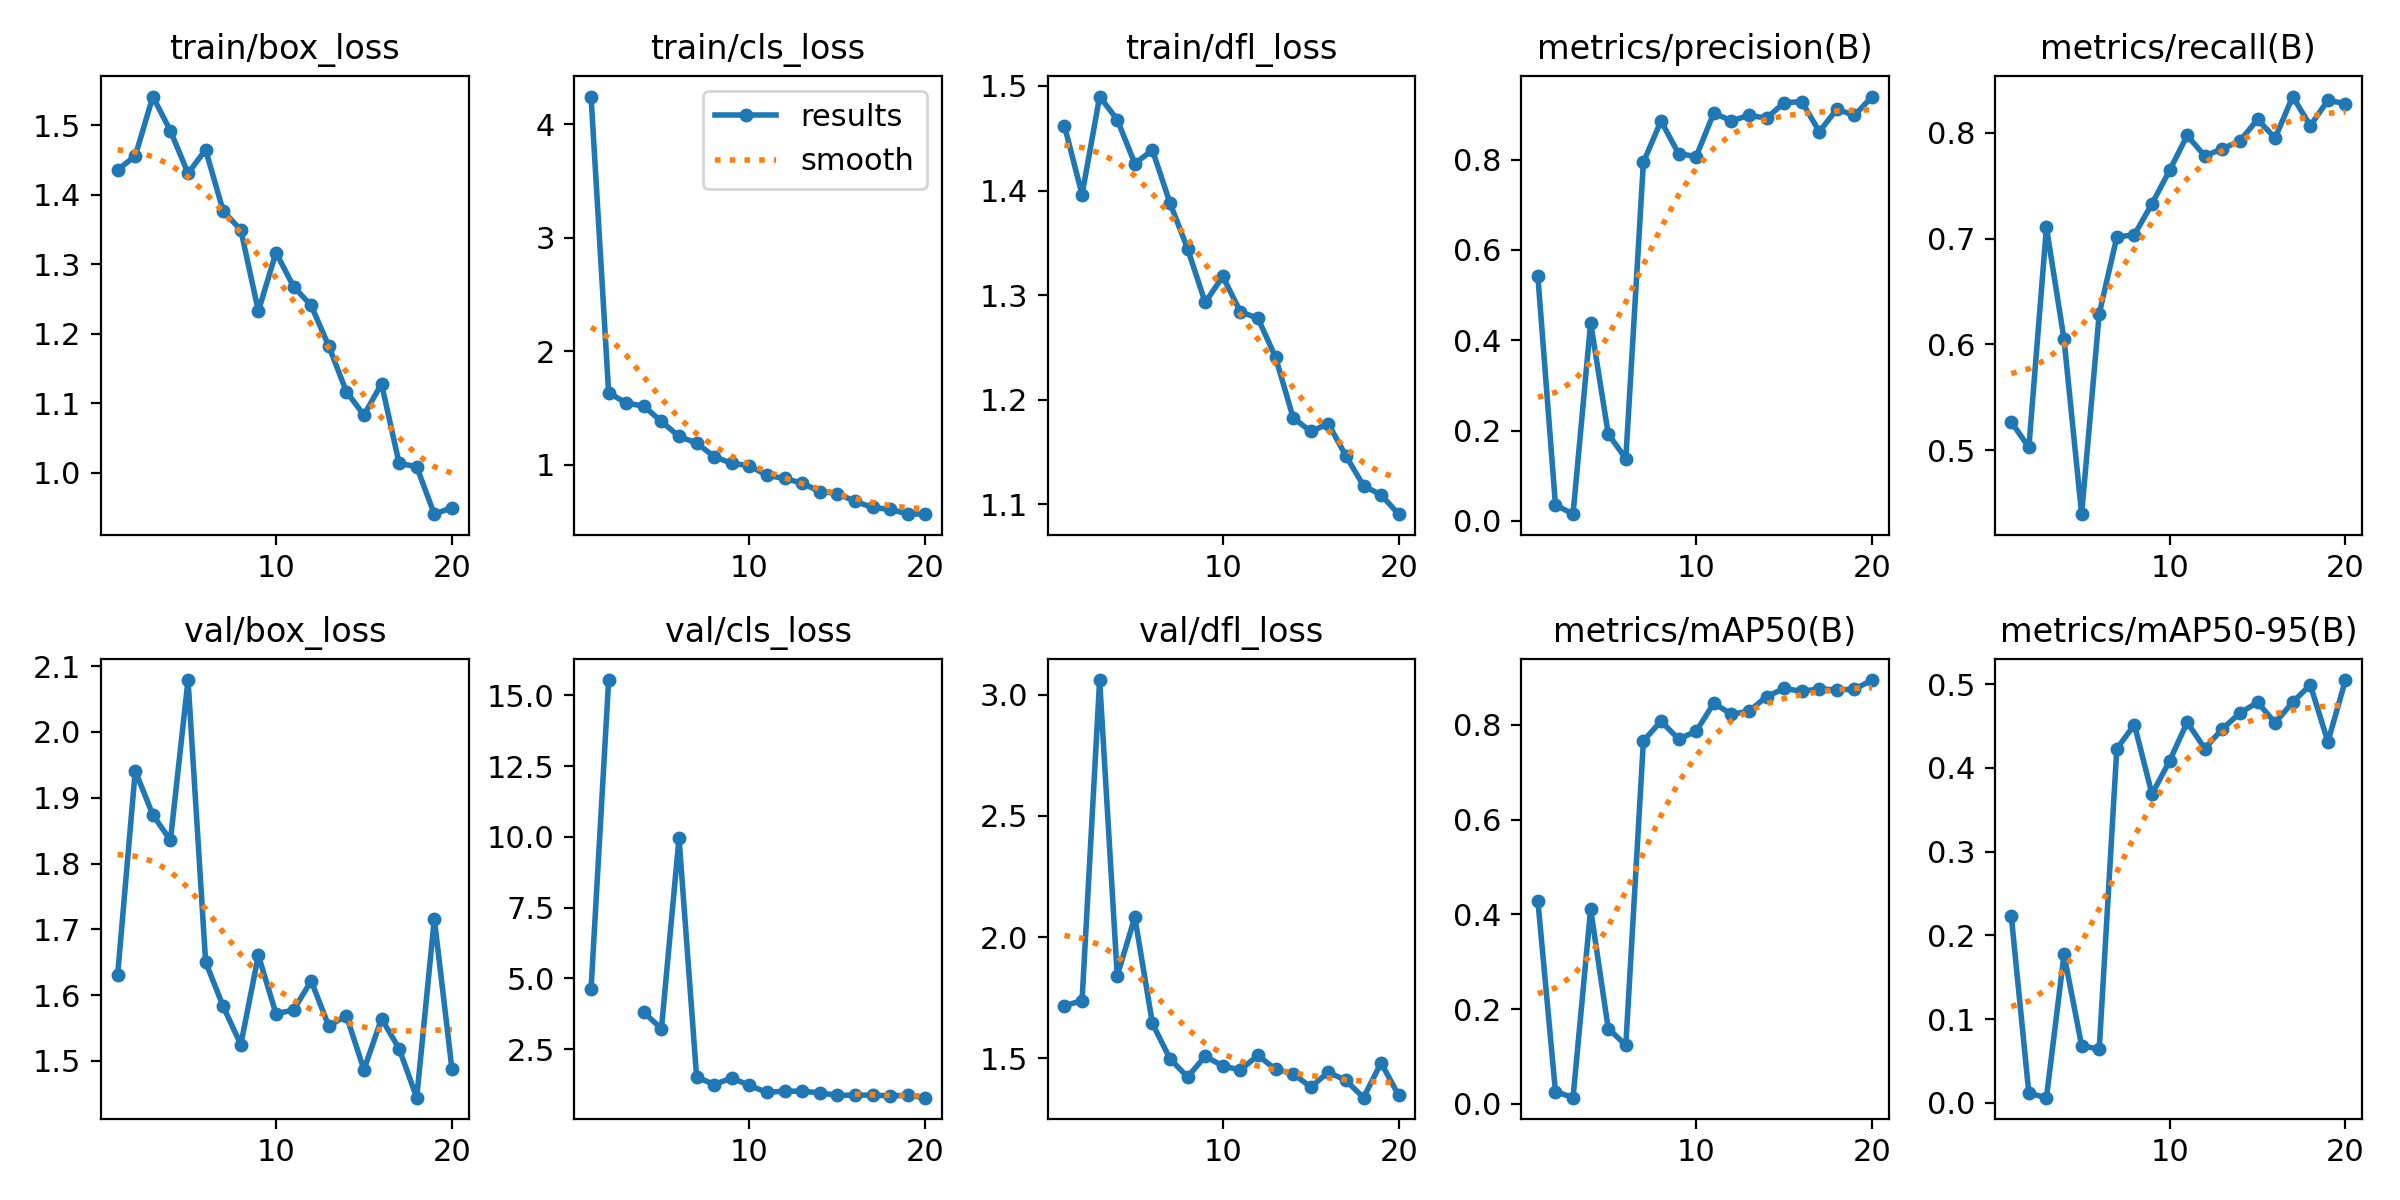

In [ ]:
Image(filename='runs/detect/train3/results.png', width=600)

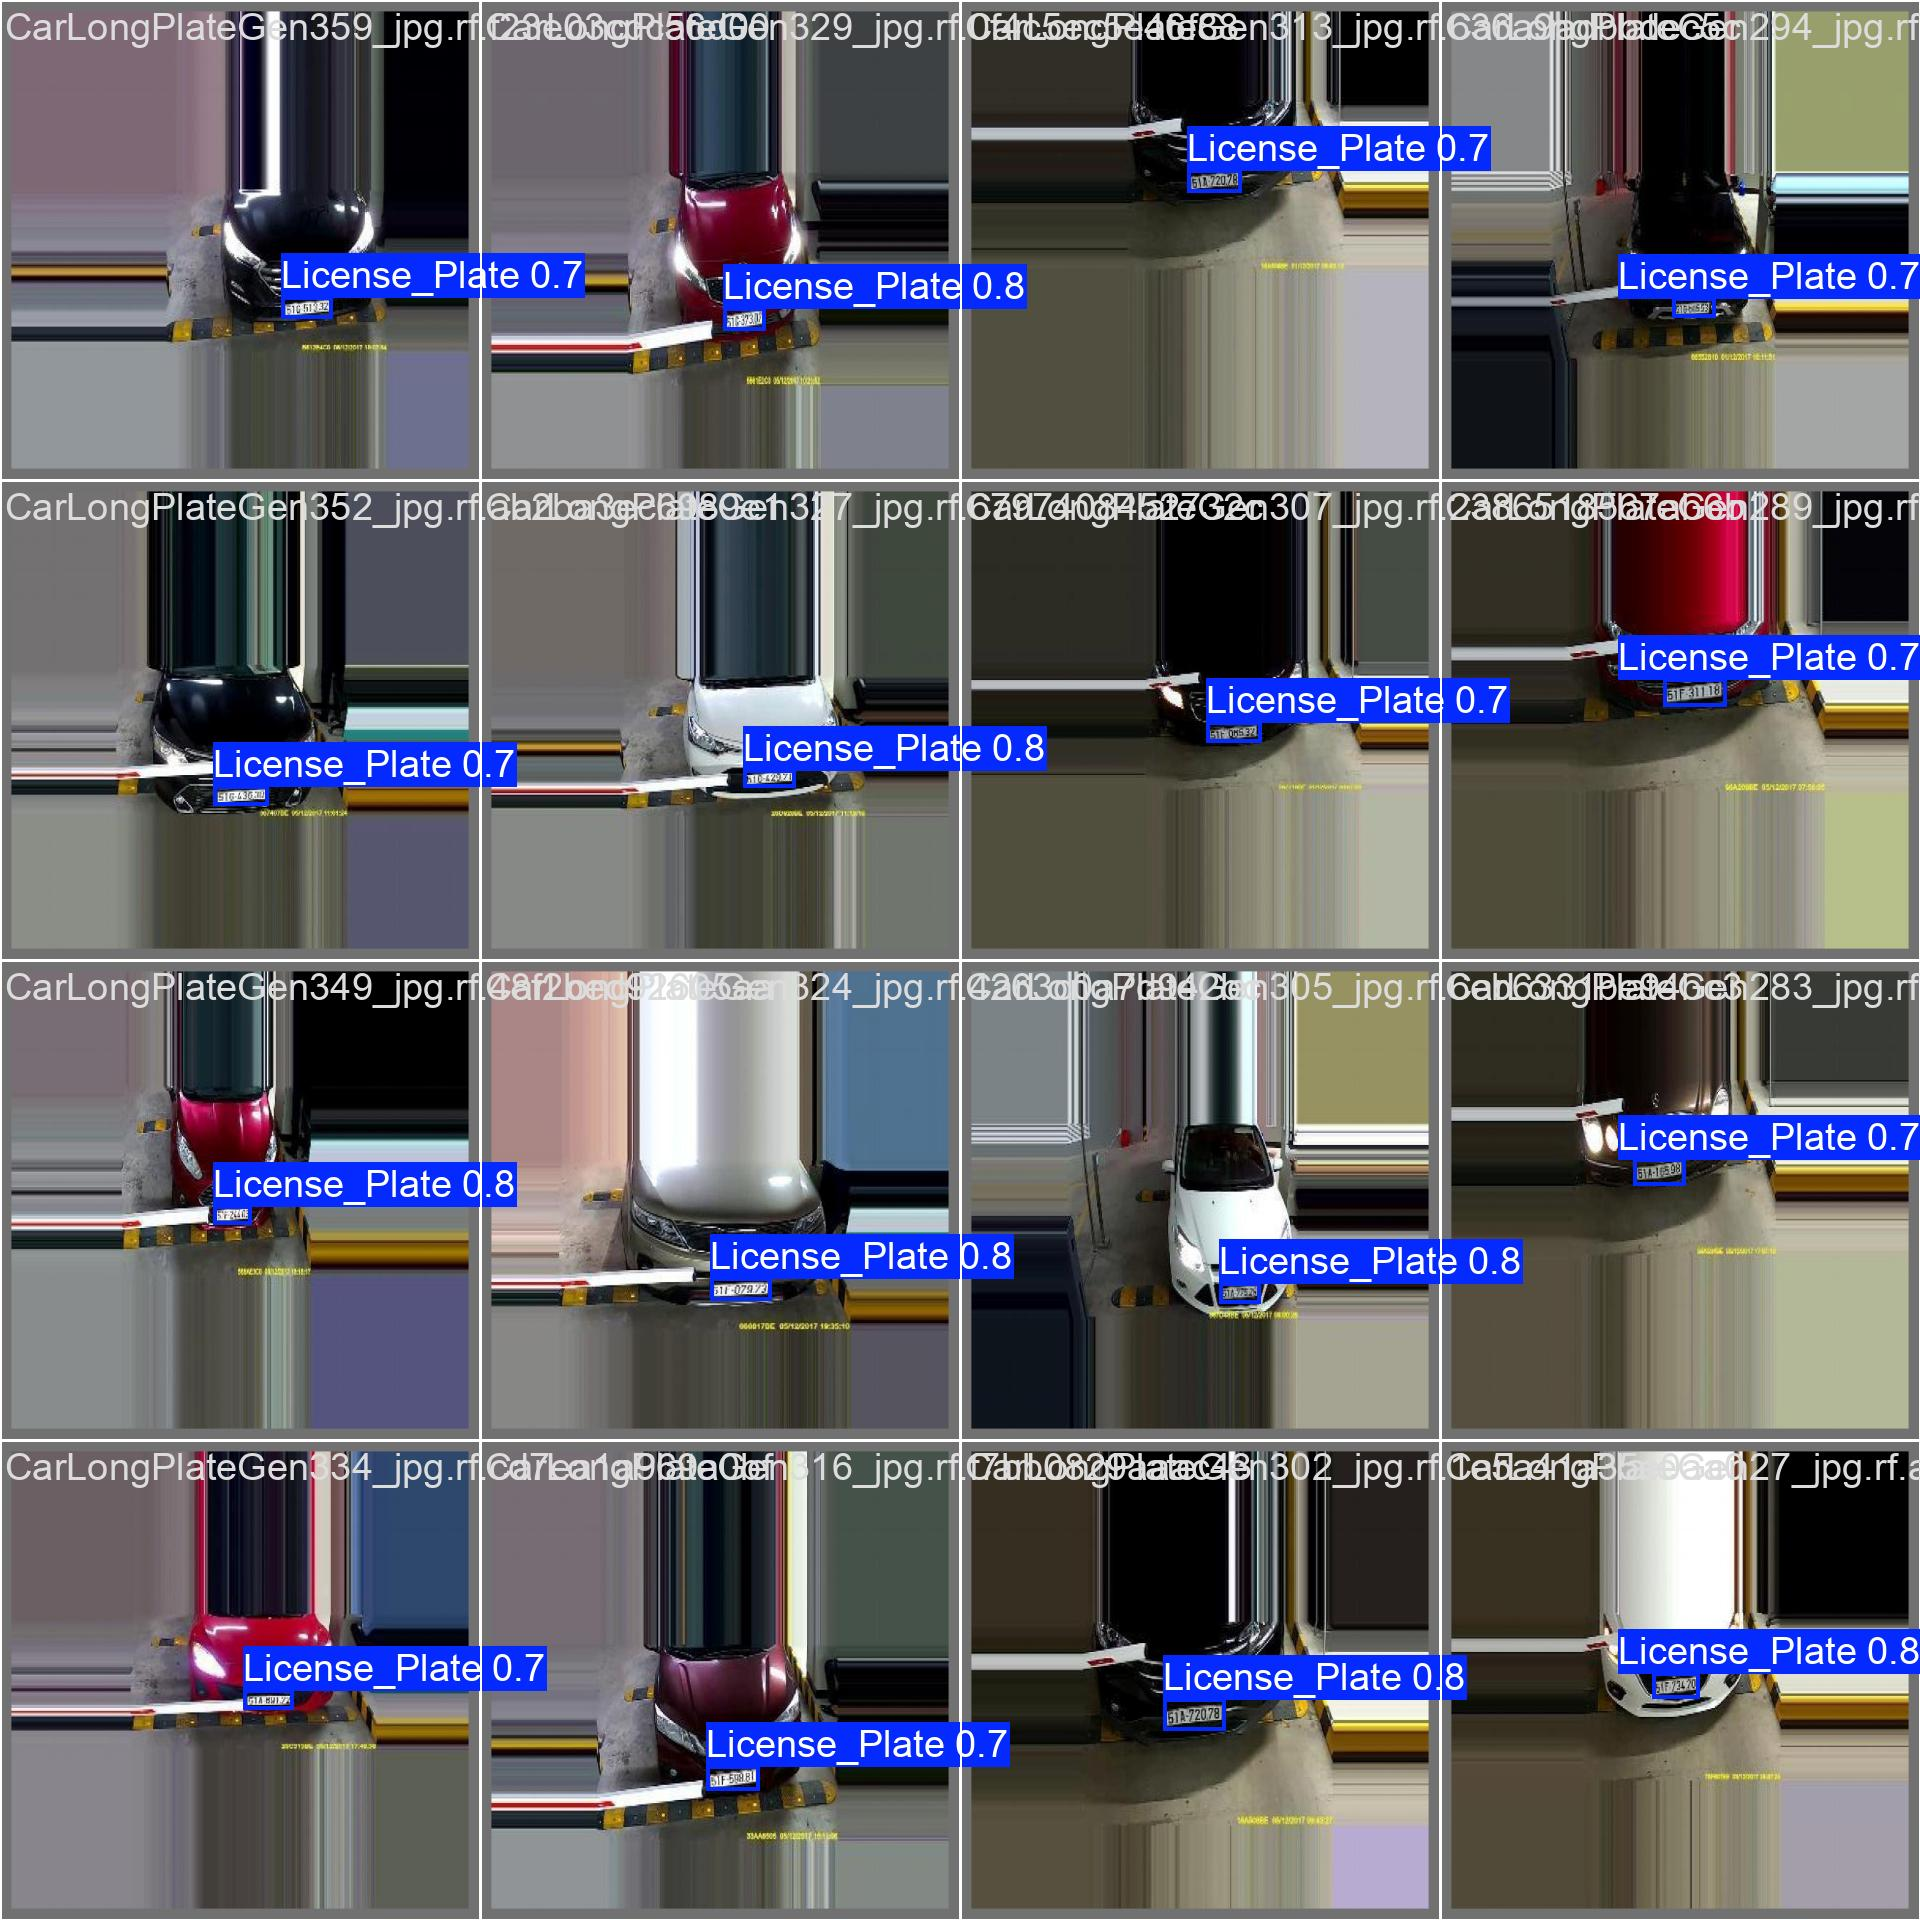

In [ ]:
Image(filename='runs/detect/train3/val_batch1_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=runs/detect/train3/weights/best.pt data=data.yaml

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Collab/Yolo/data4/valid/labels.cache... 500 images, 0 backgrounds, 0 corrupt: 100% 500/500 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 32/32 [00:12<00:00,  2.47it/s]
                   all        500        539      0.943       0.83      0.895      0.506
Speed: 1.7ms preprocess, 8.7ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.50 source=/content/drive/MyDrive/Collab/Yolo/randoms

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/Collab/Yolo/randoms/resize-17297724391745679550random24thoct.png: 640x640 1 License_Plate, 64.7ms
Speed: 4.5ms preprocess, 64.7ms inference, 956.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


**NOTE:** Let's take a look at few results.

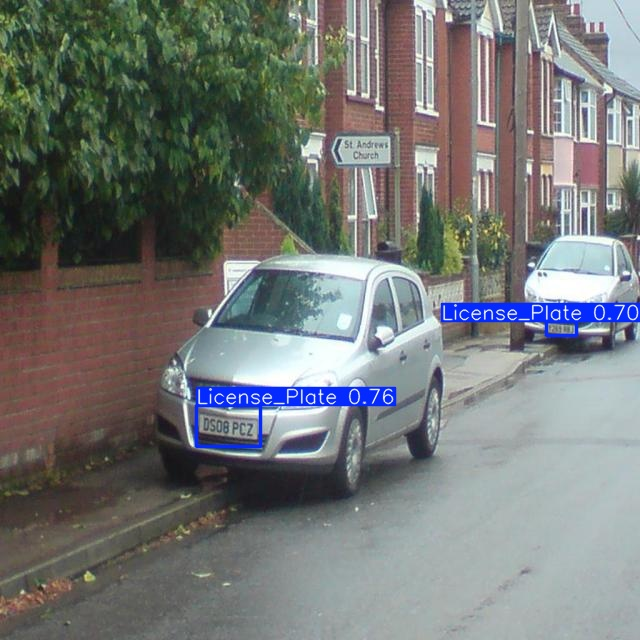

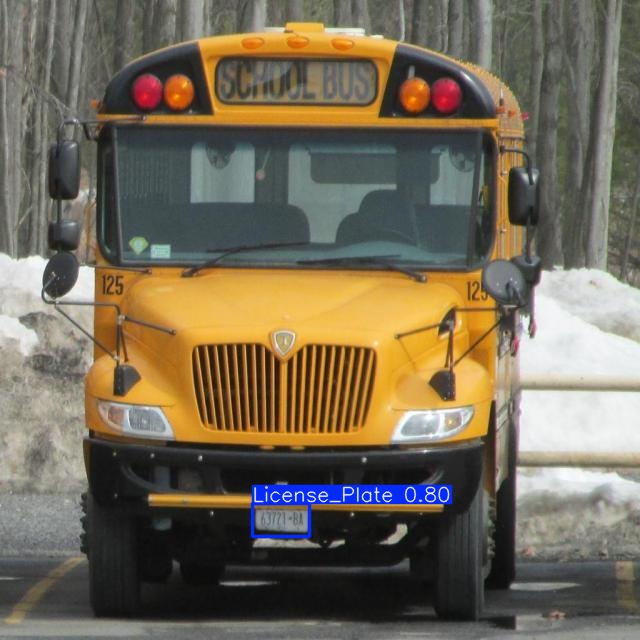

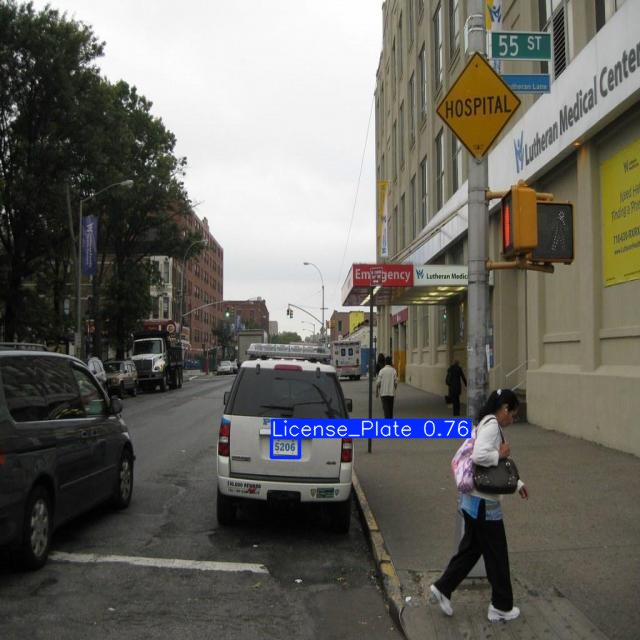

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")